# Description of Gold Price:

**The price of gold is a dynamic and globally influential economic indicator that reflects the value of gold per unit of weight. Gold is a precious metal with a long history of being used as a store of value, a medium of exchange, and a symbol of wealth. It is traded on various commodities exchanges worldwide, and its price is influenced by a myriad of factors, including economic conditions, geopolitical events, inflation, interest rates, and currency movements.**

**Investors often turn to gold as a safe-haven asset during times of economic uncertainty, as its value tends to be inversely correlated with the strength of traditional financial markets. Additionally, gold is widely used in jewelry and has industrial applications, further impacting its demand and, consequently, its price.**

# Machine Learning Solutions for Gold Price Prediction:
**Machine learning (ML) can be leveraged to analyze historical and real-time data, helping to predict and understand the complex patterns that influence gold prices. Here are ways in which machine learning can contribute to solving challenges related to predicting gold prices:**

Time Series Analysis:
        Machine learning algorithms, particularly those designed for time series analysis, can analyze historical gold price data to identify trends, seasonal patterns, and cyclic behaviors. This information can be valuable for predicting future price movements.

    Sentiment Analysis:
        ML models can process vast amounts of textual data from news articles, social media, and financial reports to gauge market sentiment. Sentiment analysis can provide insights into how positive or negative news and events might impact investor confidence and influence gold prices.

    Macro-Economic Indicators:
        ML algorithms can assimilate and analyze macroeconomic indicators such as inflation rates, interest rates, and currency values. By understanding the relationships between these factors and gold prices, machine learning models can make predictions based on changes in economic conditions.

    Geopolitical Event Impact Assessment:
        Geopolitical events often have a significant impact on gold prices. Machine learning can assess historical data to understand how events such as political instability, trade tensions, or global crises have affected gold prices, enabling predictions for similar events in the future.

    Integration of Alternative Data Sources:
        ML models can incorporate alternative data sources, such as satellite imagery to assess mining activities, or shipping data to gauge demand for gold. Integrating diverse datasets can enhance the accuracy of predictions by providing a more comprehensive view of the factors influencing gold prices.

    Portfolio Optimization:
        Machine learning can assist investors in optimizing their portfolios by recommending strategies based on predicted gold price movements. This includes dynamically adjusting asset allocations and hedging strategies to manage risk.

**While machine learning holds promise in predicting gold prices, it's important to note that financial markets are inherently unpredictable, and models may not always accurately forecast future movements. Additionally, market dynamics can change rapidly, requiring continuous model refinement and adaptation. Collaborative efforts between financial experts, data scientists, and regulatory bodies are essential to ensure responsible and informed use of machine learning in predicting gold prices.**

# Import libraries

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Data collection and processing

In [2]:
df = pd.read_csv('/kaggle/input/gold-price-data/gld_price_data.csv')

In [3]:
df.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [4]:
df.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
df = df

In [6]:
df.shape

(2290, 6)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [8]:
df.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [9]:
correlation = df.iloc[:,1:].corr()

<Axes: >

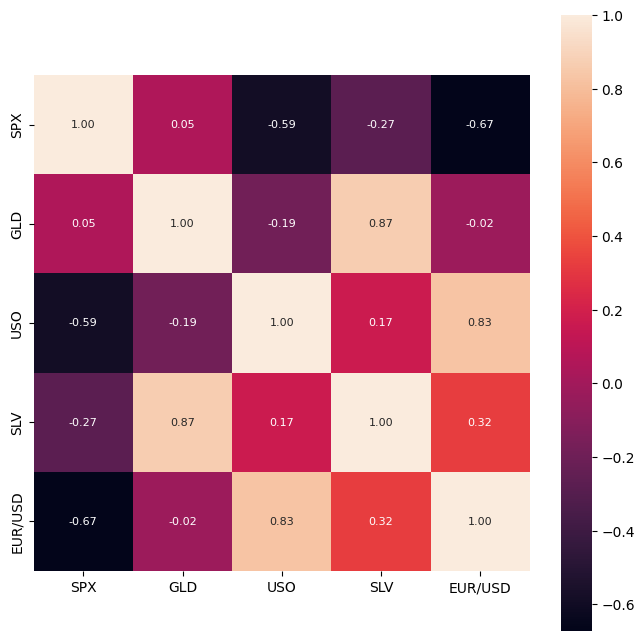

In [10]:
plt.figure(figsize = (8,8))
sns.heatmap(correlation,cbar=True,square=True,fmt='.2f',annot=True,annot_kws={'size':8 })

In [11]:
correlation['GLD']

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64

/tmp/ipykernel_20/2135571439.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

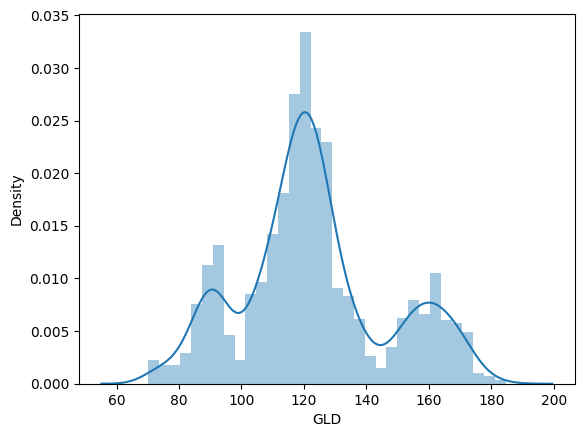

In [12]:
# check distribution of gld
sns.distplot(df['GLD'])

# splitting data

In [13]:
x = df.drop(['Date','GLD'],axis=1)
y = df['GLD']


In [14]:
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=.2,random_state=42)

# train model

In [15]:
    regressor = RandomForestRegressor(n_estimators=100)

In [16]:
regressor.fit(x_train,y_train)

RandomForestRegressor()

# model evaluation

In [17]:
test_pred = regressor.predict(x_test)

In [18]:
test_pred

array([122.46209912, 130.10720299, 127.58769954,  96.85829743,
       118.65200101, 114.56209957, 124.76360148, 117.90339962,
       107.98050098,  98.29869941,  95.51809948, 167.15939808,
       149.55520093, 116.18950096, 170.73370109,  85.34819987,
       123.23589883, 109.27489721, 113.2087009 , 131.78690314,
       124.32939896, 113.50330086, 115.85150091, 108.77839997,
       108.49420153, 125.72729937, 119.07969967, 112.51849906,
       113.26140103, 125.38979913, 145.72940074,  89.68080012,
       167.66079986, 113.84829927, 108.42960114, 120.34550093,
       142.17669936, 161.39450187, 174.11069803, 153.29960138,
       118.93700115, 113.39260079, 121.37389962, 113.8322995 ,
       121.94753787, 107.98280094,  88.5403991 , 114.36679947,
       129.61260224, 117.91600074, 104.03740033, 129.6503024 ,
       107.05649842, 160.78940267, 131.45190056, 118.28029945,
       146.87800129, 136.12110157,  95.61570116, 124.75650138,
       115.27929871,  86.1750009 , 104.3344992 , 113.72

In [19]:
erorr_score = metrics.r2_score(y_test,test_pred)

In [20]:
erorr_score

0.9898421726466716

In [21]:
y_test = list(y_test)

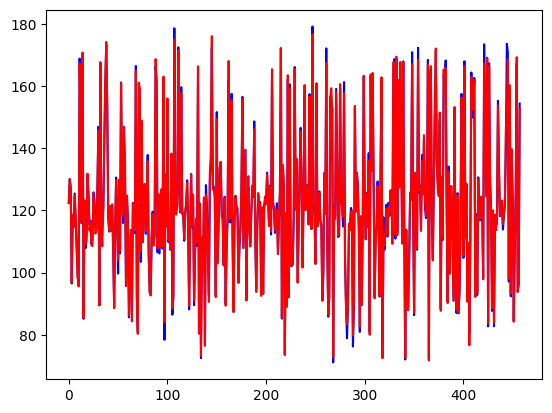

In [22]:
plt.plot(y_test , color = 'blue',label ='Actual Values')
plt.plot(test_pred , color = 'red',label ='preds Values')